# Classificação

1. Carregue uma base de dados de classificação (binária ou multiclasse, mas não multirrótulo) que NÃO esteja nos toy datasets do scikit-learn;

Escolhi um dataset sobre o desastre do Titanic. Vi que ele será utilizado em exercícios posteriores, então, para familiarizar com o conteúdo, vou utilizá-lo neste também. 

Disponível no Kaggle: https://www.kaggle.com/heptapod/titanic

Algumas alterações na base original feitas pelo próprio disponibilizador do Kaggle para melhorar resultados em regressão logística:

"This is the original data from Titanic competition plus some changes that I applied to it to be better suited for binary logistic regression:
Merged the train and test data.
Removed the 'ticket' and 'cabin' attributes.
Moved the 'Survived' attribute to the last column.
Added extra zero columns for categorical inputs to be better suited for One-Hot-Encoding.
Substituted the values of 'Sex' and 'Embarked' attributes with binary and categorical values respectively.
Filled the missing values in 'Age' and 'Fare' attributes with the median of the data."

In [155]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

titanic_set = pd.read_csv("G:/Meu Drive/Mestrado/Disciplinas/RP/disciplina_rp/classification_datasets/titanic_train_and_test2.csv")
titanic_set.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [156]:
#alterando nome da ultima coluna
titanic_set.rename(columns={"2urvived": "Survived"})

#removendo as colunas que não serão consideradas
titanic_set.drop(titanic_set.columns[titanic_set.columns.str.contains('zero')], axis=1, inplace=True)

 #o id não contribui com informações na classificação
titanic_set = titanic_set.drop('Passengerid', 1)
titanic_set.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0


2. Treine um modelo da classe LogisticRegression do scikit-learn com toda a base;

In [157]:
#verifiquei que haviam dois registros com valores nulos na coluna Embarked, portant removi
titanic_set.dropna(inplace=True)
titanic_set.isnull().sum()


Age         0
Fare        0
Sex         0
sibsp       0
Parch       0
Pclass      0
Embarked    0
Survived    0
dtype: int64

In [158]:
y = titanic_set.Survived
X = titanic_set.drop('Survived', 1)

len(X), X.shape, len(y), y.shape

(1307, (1307, 7), 1307, (1307,))

In [159]:
from sklearn.linear_model import LogisticRegression

#precisei aumentar as iterações, pois não estava convergindo com o padrão
modelo = LogisticRegression(solver='lbfgs', max_iter=400)
modelo.fit(X, y)
ypred = modelo.predict(X)

print(modelo.coef_, modelo.intercept_)

[[-3.09409817e-02 -5.27987859e-04  1.84500257e+00 -1.81021808e-01
  -2.78163223e-02 -7.90441807e-01 -4.78947170e-02]] [0.94420917]


3. Calcule o MSE (erro quadrático médio) para todos os exemplos da usada como treino no modelo treinado;

In [160]:
#Testando 3 valores de delta para cada classe para obter bons deltas em torno do erro encontrado

'''delta = [0.8, 0.4, 0.1]

i = 2

erros = []
intercept = modelo.intercept_[0]
ws = np.linspace(intercept-delta[i], intercept+delta[i], 101)

for w in ws:
    modelo.intercept_[0] = w
    ypred = modelo.predict(X)
    erro = mean_squared_error(y, ypred)
    erros.append(erro)

modelo.intercept_[0] = intercept
plt.ylabel("Erro")
plt.xlabel(f"W[{i}]")
plt.plot(ws, erros)
plt.show()'''

'delta = [0.8, 0.4, 0.1]\n#Variar de 0 a 6 conforme colunas do dataset\ncarac = 2\n\nerros = []\nintercept = modelo.intercept_[0]\nws = np.linspace(intercept-delta[carac], intercept+delta[carac], 101)\n\nfor w in ws:\n    modelo.intercept_[0] = w\n    ypred = modelo.predict(X)\n    erro = mean_squared_error(y, ypred)\n    erros.append(erro)\n\nmodelo.intercept_[0] = intercept\nplt.ylabel("Erro")\nplt.xlabel(f"W[{carac}]")\nplt.plot(ws, erros)\nplt.show()'

In [161]:
#após testar os deltas, os que melhor se aproximam do entorno do erro foram esses 3.
delta = [0.8, 0.4, 0.1]

def plot(idx):
    '''
    Plotar o gráfico para cada caracteristica i informada.
    '''
    erros = []
    intercept = modelo.intercept_[0]

    #criando um vetor com os valores com range delta no entorno do intercept_ 
    ws = np.linspace(modelo.intercept_ - delta[idx], modelo.intercept_ + delta[idx], 101)

    for w in ws:
        modelo.intercept_[0] = w
        ypred = modelo.predict(X)
        erro = mean_squared_error(y, ypred)
        erros.append(erro)

    modelo.intercept_[0] = intercept
    plt.ylabel("Erro")
    plt.xlabel(f"W[{idx}]")
    plt.plot(ws, erros)
    plt.show()

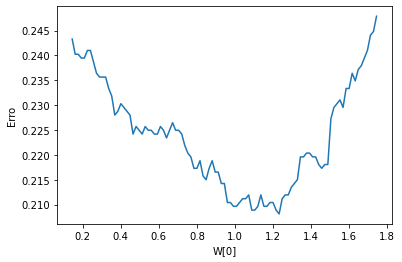

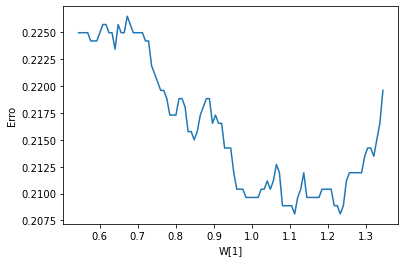

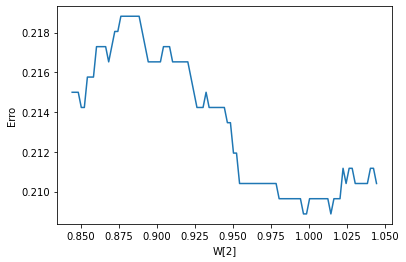

In [162]:
# Neste dataset, intercept_ possui apenas um valor. Portanto, tenho 3 deltas para o intercept_. Caso nova base possua mais intercept_, aumento de 3 em 3 os valores estimados em delta
# Com for garante funcionamento caso mude a base de dados
#for i in range(len(modelo.intercept_)):

plot(0)
plot(1)
plot(2)

Como o dataset é classificação binária o intercept_ possui apenas um valor no vetor e geramos apenas 3 deltas e consequentemente, 3 gráficos.

Do gráfico 1 ao 3 o valor de delta é cada vez menor, fazendo com que olhemos cada vez o comportamento do erro mais nas proximidades do intercept_. Como suposto no exercício, com a função LogistRegression para classificação binária o comportamento da função não é tão "bem comportado" quanto o LinearRegression levando a vários mínimos locais, conforme pode ser visto nos gráficos.